# Learning Curves for classification

For these exercises, it is necessary to understand a bit more about how the data is loaded. The datasets are loaded as a so called 'databunch', which puts the dataset in numpy matrices in the properties train_X, train_y, valid_X and valid_y. Both SKLearn and ML can use the data in this format. However, this is not the easiest format to inspect the data. For this reason, most datasets have function that loads the data as a Pandas Dataframe, and that function always has the \_pd suffix, so `wine` and `wine_pd`. In the Pandas Dataframe you can easily see the names of the features and view examples of the values.

When you load a dataset, you can control how it is loaded and prepared through some optional parameters. For example, for the boston dataset: 
- boston('lstat', 'nox'): these labels are the features that are used. They must match columns in the Dataframe. If you omit giving specific features, you get all features.
- boston( degree=n ): transforms the data so that you can fit an n-order polynomial
- boston( valid_perc=0.x ): Splits the dataset so that 0.x fraction of it is used for validation and 1 - 0.x fraction for training.
- boston( bias=True ): inserts a bias column for computing the model mathematically
- boston( column_y=True ): converts the target variable into a column vector, also for computing the model mathematically.
- boston( scale=True ): normalizes all the features to a distribution with zero mean and variance of 1. This helps when you train with multiple features that differ greatly in value.



# Exercises

In general, each time you get a dataset, and a model is learned. You are asked to diagnose the learning curve and take appropriate actions to improve learning.

In [1]:
from ml import *

#### What is your diagnosis of the plot below? If anything is wrong, try to fix it.

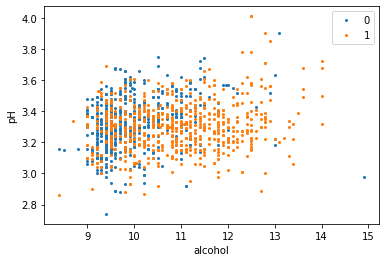

In [2]:
data = wines_binary('quality', 'alcohol', 'pH', threshold=6)
data.plot2d()

To manually control how logistic regression fits the model, we use `logistic_regression_sgd`. Note that this is not the SKLearn version, because that does not allow partial fitting. Also note that for logistic regression, the learning curve is often a lot less fluent and local minima do exist.

Note, if the learning curve is not readable because the difference in loss is big in the beginning, it may help to skip the first n recordings by using `model.history.plot(start=n)`

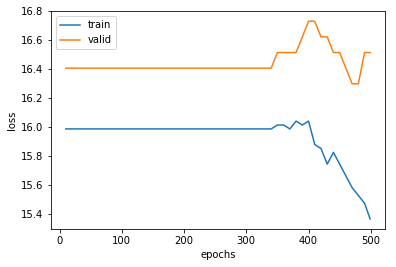

In [3]:
data = wines_binary('quality', 'alcohol', 'pH', threshold=6)
model = logistic_regression_sgd(data)
model.train(500, lr=0.00003, report_frequency=10, bar=False, verbose=False)
model.history.plot(start=1)

In [19]:
!ls /data

aphasia      datasets		    opschaler	  pepper    tmp
assignments  gemeenten2017.geojson  ortho	  shipping  urbinn
building     lost+found		    ortho2	  statline
cyber	     momo		    ortho_backup  test.png


   0 0.00s train loss: 10.342827  acc: 0.700547 valid loss: 10.037929  acc: 0.709375
 100 0.00s train loss: 10.288818  acc: 0.702111 valid loss: 10.037929  acc: 0.709375
 200 0.00s train loss: 10.342827  acc: 0.700547 valid loss: 10.037929  acc: 0.709375
 300 0.00s train loss: 10.342827  acc: 0.700547 valid loss: 10.037929  acc: 0.709375
 400 0.00s train loss: 10.315822  acc: 0.701329 valid loss: 10.037927  acc: 0.709375
 500 0.00s train loss: 10.396834  acc: 0.698984 valid loss: 9.929993  acc: 0.712500
 600 0.00s train loss: 10.369830  acc: 0.699765 valid loss: 9.929993  acc: 0.712500
 700 0.00s train loss: 10.315820  acc: 0.701329 valid loss: 9.929993  acc: 0.712500
 800 0.00s train loss: 10.234805  acc: 0.703675 valid loss: 9.822057  acc: 0.715625
 900 0.00s train loss: 10.126787  acc: 0.706802 valid loss: 9.929993  acc: 0.712500
1000 0.00s train loss: 10.180796  acc: 0.705238 valid loss: 10.037927  acc: 0.709375
1100 0.00s train loss: 10.153792  acc: 0.706020 valid loss: 9.929993  

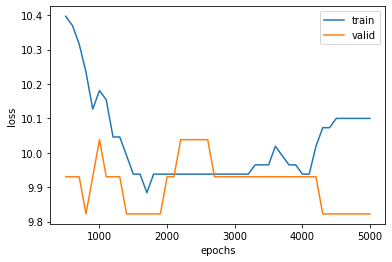

In [18]:
data = wines_binary('quality', 'alcohol', 'pH', threshold=6, scale = True)
model = logistic_regression_sgd(data)
model.train(5000, lr=0.00001, report_frequency=100, bar=False)
model.history.plot(start=5)